In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("oasis_longitudinal.csv")

In [4]:
data.head()
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
for i in data.columns:
    print(i)

Subject ID
MRI ID
Group
Visit
MR Delay
M/F
Hand
Age
EDUC
SES
MMSE
CDR
eTIV
nWBV
ASF


Subject ID - Subject Identification (i.e. OAS2_0001)
MRI ID - MRI Exam Identification (i.e. OAS2_0001_MR1)
Group - Class (i.e. Demented, Nondemented)
Visit - Number of visits (i.e. 1-5)
MR Delay - Number of days of delay between visits (i.e. 0-2639)
M/F - Gender (i.e. M, F)
Hand - Right or Left-Handed (i.e. R)
Age - Age at time of image acquisition (years). (i.e. 60-98)
EDUC - Years of education (i.e. 6-23)
SES - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status) (i.e. 1-5)
MMSE - Mini-Mental State Examination (i.e. 4-30)
CDR - Clinical Dementia Rating (i.e. 0-2)
eTIV - Estimated total intracranial volume (cm^3) (i.e. 1106-2004)
nWBV - Normalized whole brain volume: expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process (i.e. 0.64-0.84)
ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e. the determinant of the transform matrix) (i.e. 0.88-1.59)

In [5]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Stage 1: Pre-processing 
1. Data Visualization
2. Data Imputation
3. Data Transformation

- Handling missing values by mean imputation method, a.k.a, replace missing values with the mean of all values for that attribute.
- Here, SES has 19 missing values and MMSE has 2 missing values/nulls

In [6]:
pip install missingno



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

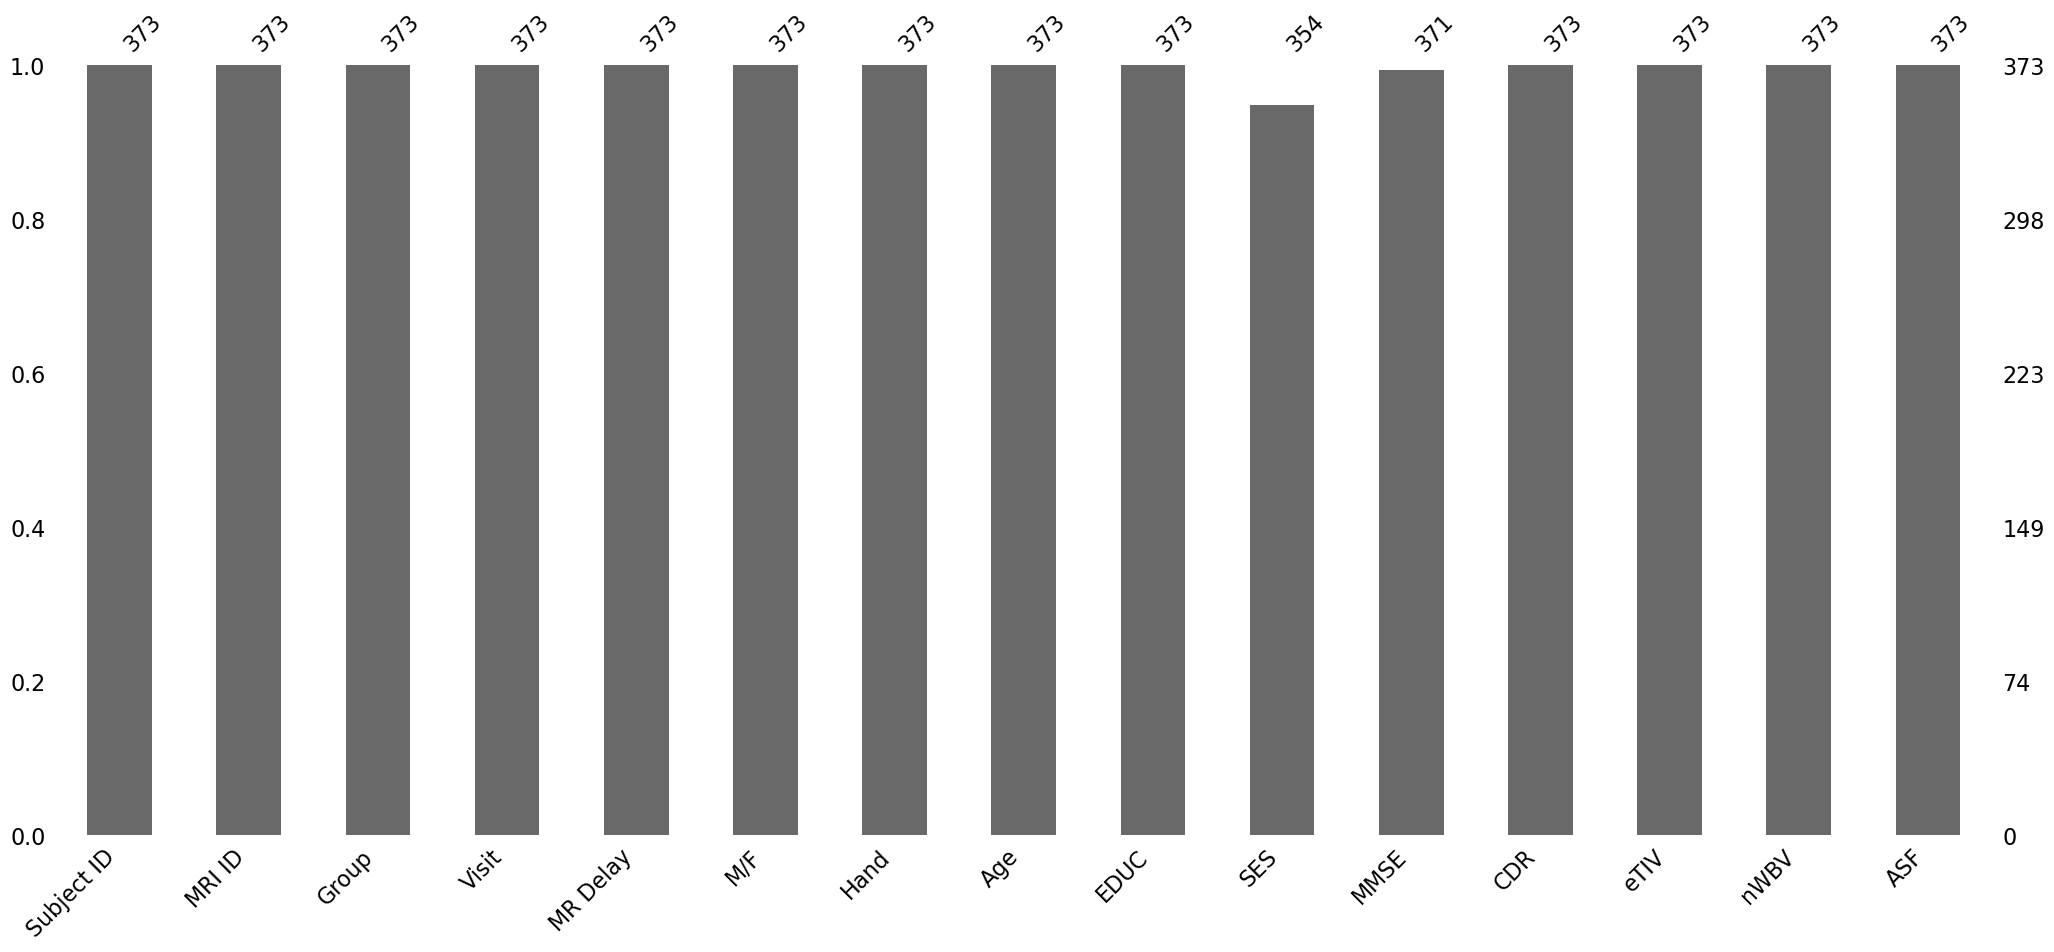

In [7]:
import missingno as msno
msno.bar(data)


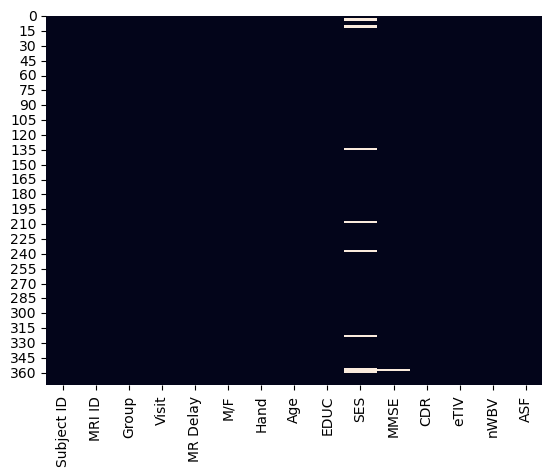

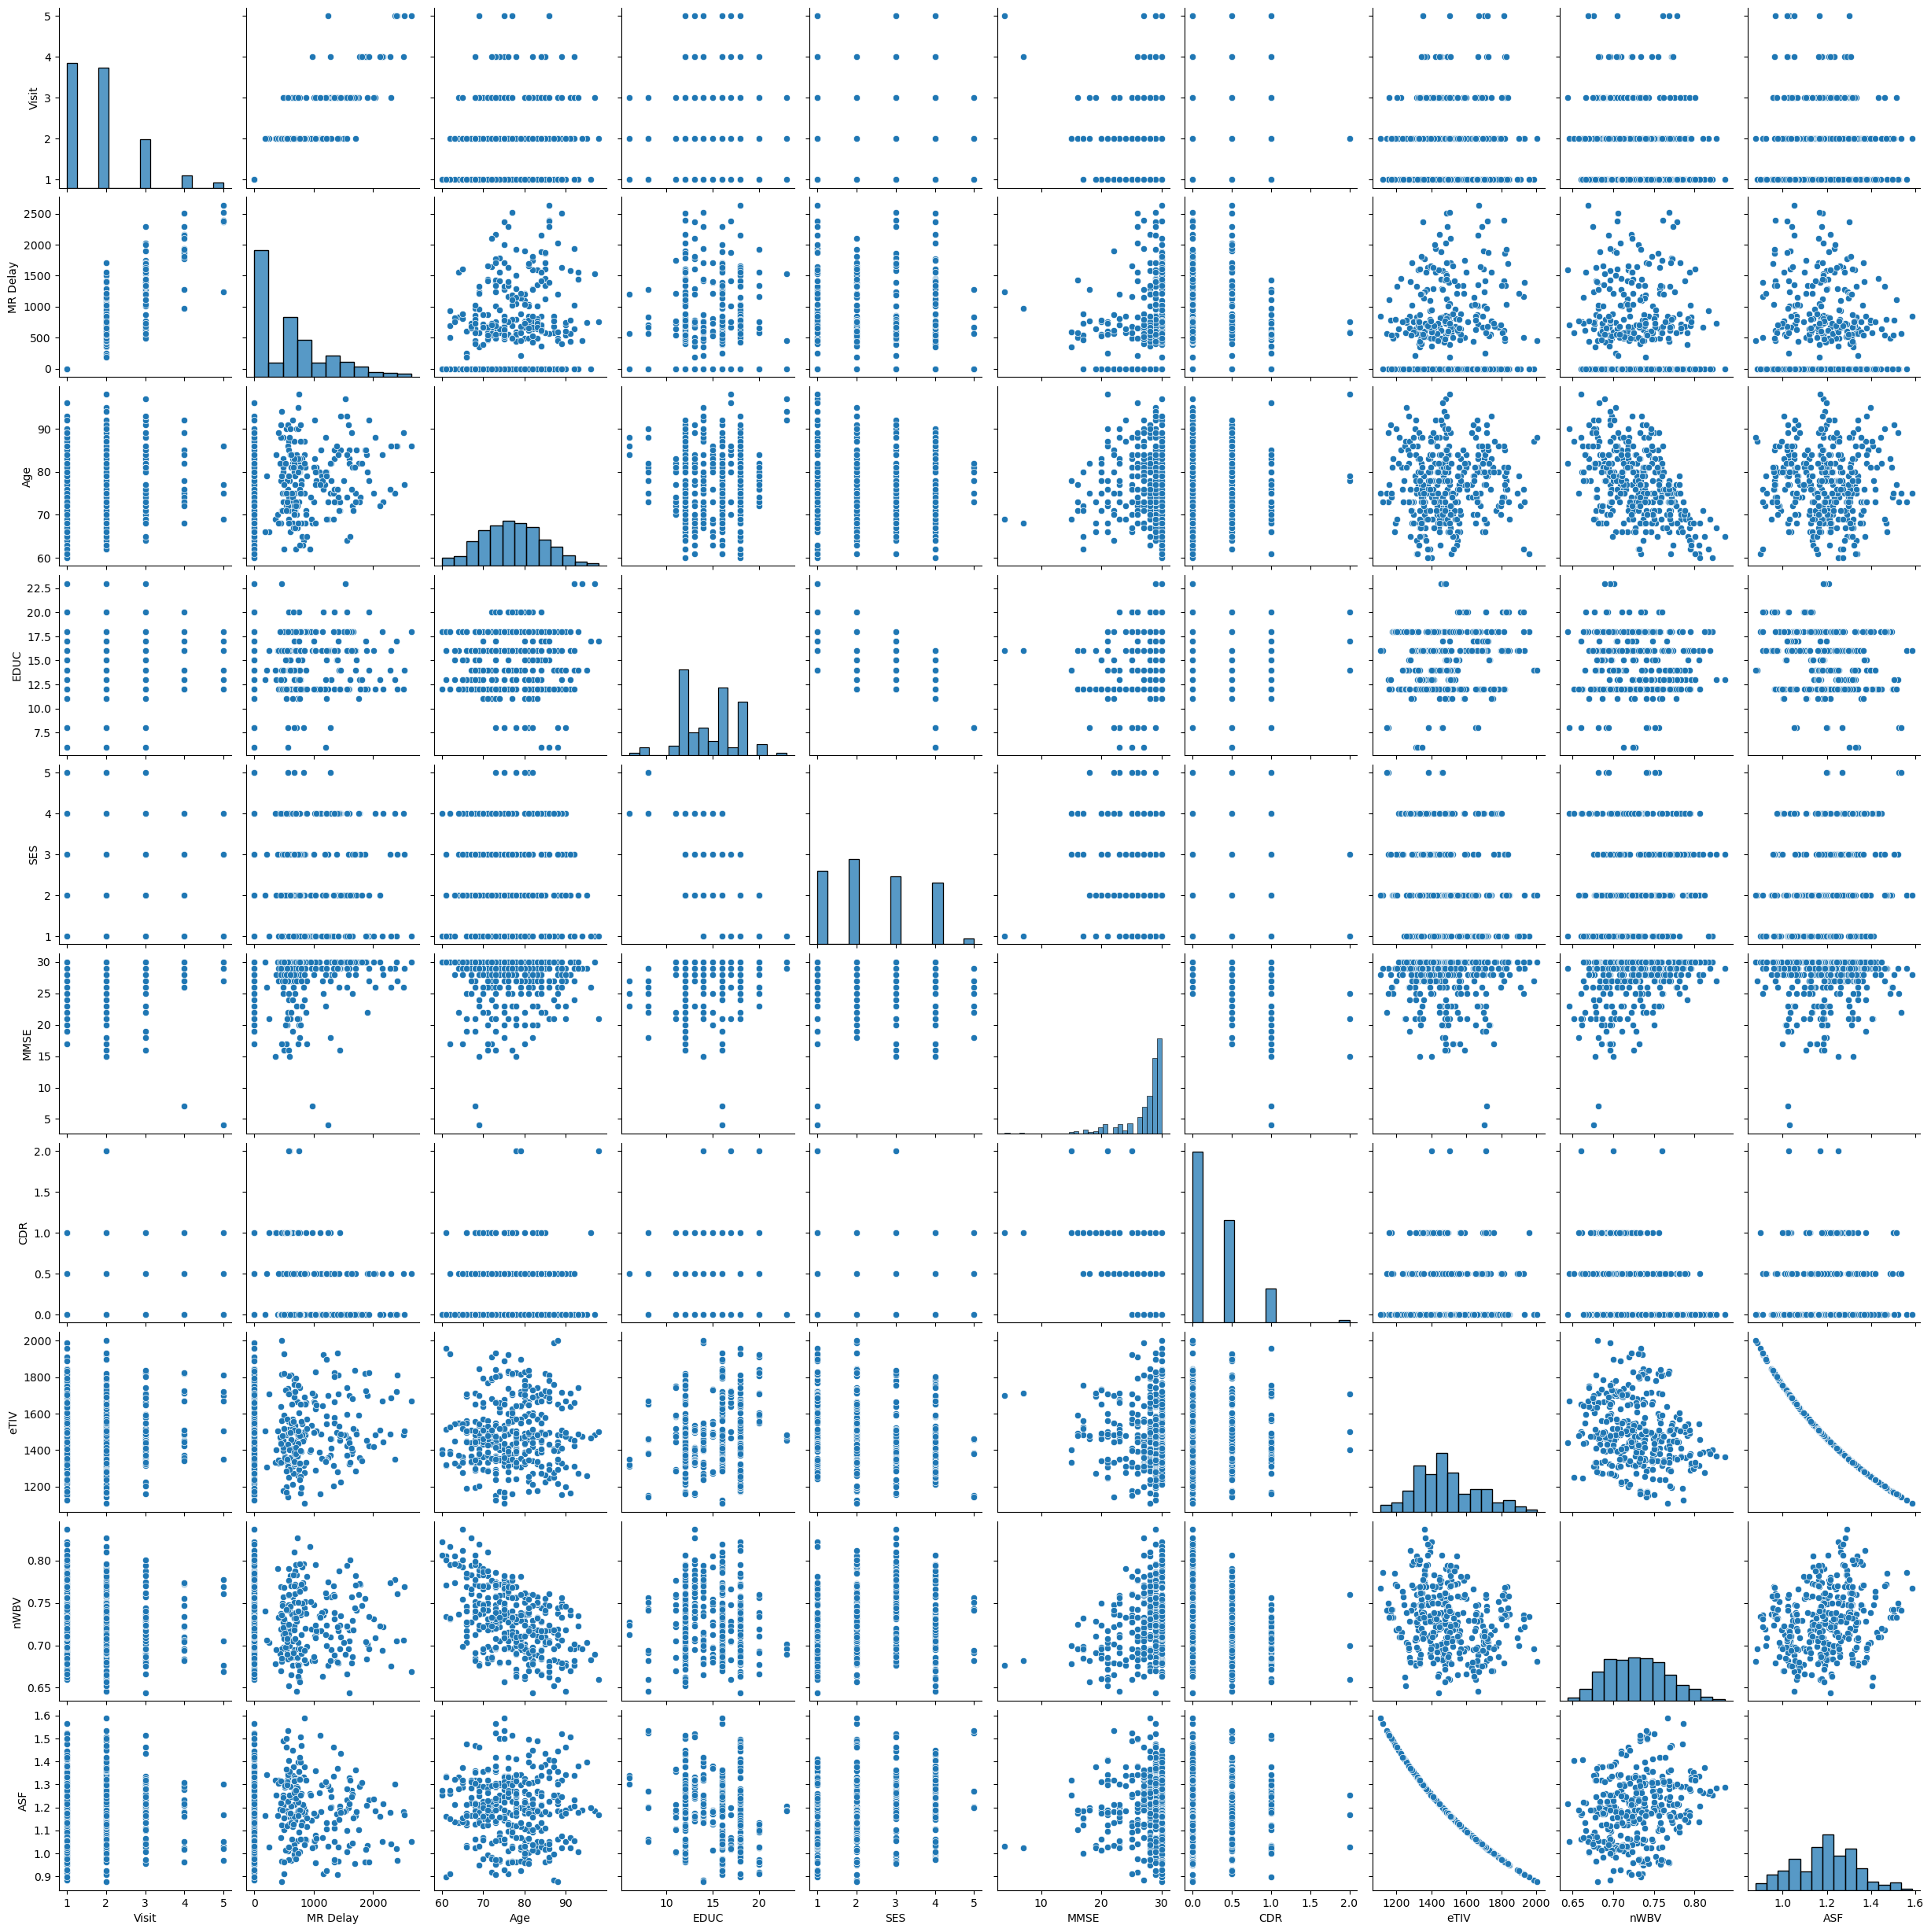

In [8]:
import seaborn as sns

# Heatmap for missing data
sns.heatmap(data.isnull(), cbar=False)
plt.show()

# Pairplot to show relationships between variables
sns.pairplot(data)
plt.show()


Above is a heatmap of the data to aid in visualization of missing data points. 
- darker areas show missing val as true
- lighter areas represent present vals as false
  

In [9]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[['SES', 'MMSE']] = imputer.fit_transform(data[['SES', 'MMSE']])
print(data)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC       SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.000000  2

In [10]:
data.isnull().sum()


Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [11]:
data['Group'] = data['Group'].replace(['Converted'], ['Demented'])
#since we want to perform binary classification as either demented or non demented, we can classify converted as demented too


In [12]:
data['Group'].value_counts()


Nondemented    190
Demented       183
Name: Group, dtype: int64

In [13]:
#we know that the data has only been collected for right-handed individuals, thus the hand column in redundant and can be dropped
data = data.drop(['Hand'], axis=1)
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [14]:
data['Group'].value_counts()


Nondemented    190
Demented       183
Name: Group, dtype: int64

<AxesSubplot:xlabel='Group', ylabel='count'>

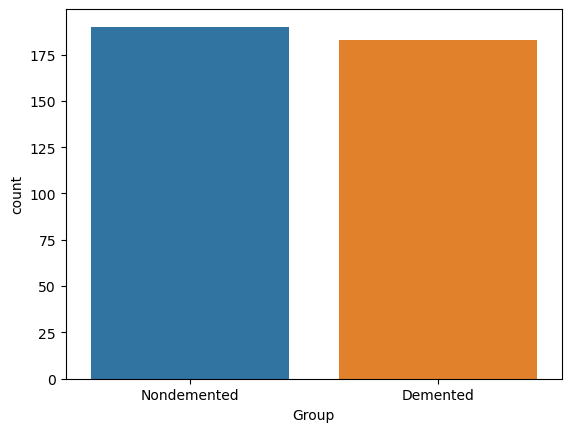

In [15]:
sns.countplot(x = 'Group', data = data)

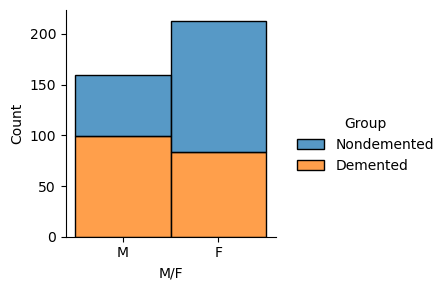

In [16]:
sns.displot(data, x='M/F', hue='Group', multiple='stack', height = 3)


In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['M/F'] = labelencoder.fit_transform(data['M/F'])
data['Group'] = labelencoder.fit_transform(data['Group'])
data.head(10)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,1,1,0,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,1,2,457,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,0,1,0,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,0,2,560,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,0,3,1895,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,1,1,0,0,88,18,3.000000,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,1,2,538,0,90,18,3.000000,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,1,1,0,1,80,12,4.000000,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,1,2,1010,1,83,12,4.000000,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,1,3,1603,1,85,12,4.000000,30.0,0.0,1699,0.705,1.033


In [18]:
print(data.dtypes)


Subject ID     object
MRI ID         object
Group           int64
Visit           int64
MR Delay        int64
M/F             int64
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


1    190
0    183
Name: Group, dtype: int64


<AxesSubplot:xlabel='Group', ylabel='count'>

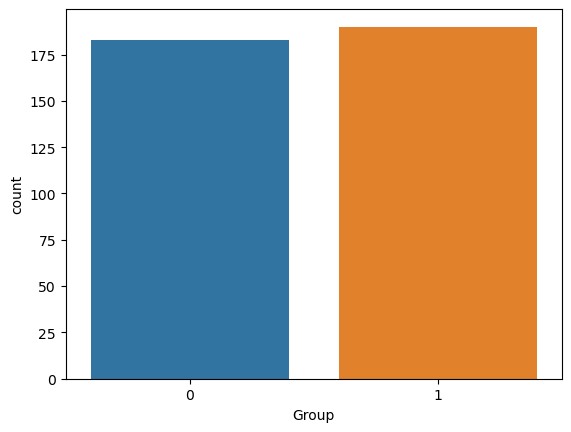

In [19]:
#before class balancing
print(data['Group'].value_counts())
sns.countplot(x = 'Group', data = data)

In [20]:
from collections import Counter
print(sorted(Counter(data['Group']).items()))

[(0, 183), (1, 190)]


In [21]:
#features
x = data[['MR Delay','CDR','M/F', 'Age', 'EDUC','SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] 
#target
y = data['Group'] 

In [22]:
#perform undersampling
!pip install imbalanced-learn

from imblearn.under_sampling import NearMiss

nearmiss = NearMiss(version=2)
X_nearmiss, y_nearmiss = nearmiss.fit_resample(x, y)

#  the number of records after undersampling
print(sorted(Counter(y_nearmiss).items()))


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
[(0, 183), (1, 183)]


In [23]:
from imblearn.under_sampling import NearMiss

nearmiss = NearMiss(version=2)
X_nearmiss, y_nearmiss = nearmiss.fit_resample(x, y)

# the number of records after undersampling
print(sorted(Counter(y_nearmiss).items()))

[(0, 183), (1, 183)]


Counter({0: 183, 1: 183})


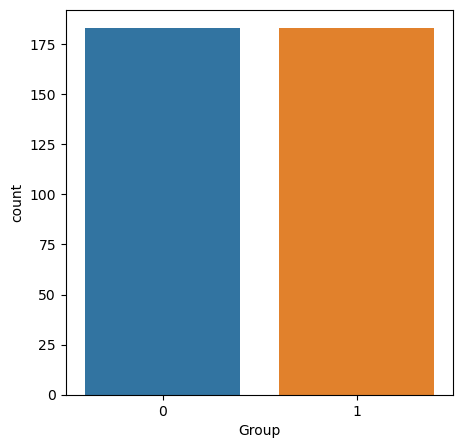

In [24]:
#after class balancing
plt.subplots(figsize=(5,5))
sns.countplot(x=y_nearmiss)
print(Counter(y_nearmiss))


feature selection by LASSO AND Chi-square

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [26]:
# LASSO
X = data[['MR Delay','CDR','M/F', 'Age', 'EDUC','SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y = data['Group']

# standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# data segregation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.01)  # You can adjust alpha (the penalty term)
lasso.fit(X_train, y_train)

#non-zero coefficients
lasso_coef = lasso.coef_

# get the selected features' indices
selected_indices = np.where(lasso_coef != 0)[0]

selected_features_Lasso = X.columns[selected_indices].tolist()

print("Selected features using LASSO:", selected_features_Lasso)

Selected features using LASSO: ['MR Delay', 'CDR', 'M/F', 'EDUC', 'eTIV', 'nWBV']


Selected Features:
  Feature  Chi-square       p-value
1     CDR  108.610650  1.975106e-25
2     M/F   10.511326  1.186451e-03
4    EDUC    7.858130  5.059268e-03
5     SES    0.679716  4.096847e-01
6    MMSE   50.273227  1.337621e-12
7    eTIV   14.140366  1.696638e-04


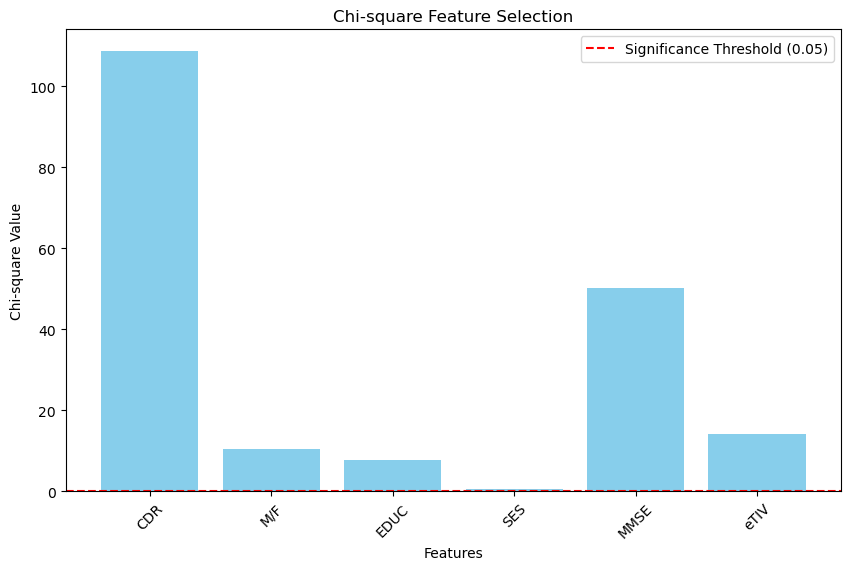

In [27]:
#Chi-square test

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

y_encoded = y

chi_scores = chi2(X, y_encoded)
chi_values, p_values = chi_scores

chi_df = pd.DataFrame({'Feature': X.columns, 'Chi-square': chi_values, 'p-value': p_values})

desired_features = ['CDR', 'MMSE', 'eTIV', 'M/F', 'EDUC', 'SES']

selected_features_Chi = chi_df[chi_df['Feature'].isin(desired_features)]

print("Selected Features:")
print(selected_features_Chi[['Feature', 'Chi-square', 'p-value']])

plt.figure(figsize=(10, 6))
plt.bar(selected_features_Chi['Feature'], selected_features_Chi['Chi-square'], color='skyblue')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('Features')
plt.ylabel('Chi-square Value')
plt.title('Chi-square Feature Selection')
plt.xticks(rotation=45)
plt.legend()
plt.show()


We perform the classification models onto 3 sets of features:
1. All features (X)
2. Those extracted from LASSO (selected_features_Lasso)
3. Those extracted from Chi-square (selected_features_Chi)

In [28]:
x

,MR Delay,CDR,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,0.0,1,87,14,2.000000,27.0,1987,0.696,0.883
1,457,0.0,1,88,14,2.000000,30.0,2004,0.681,0.876
2,0,0.5,1,75,12,2.460452,23.0,1678,0.736,1.046
3,560,0.5,1,76,12,2.460452,28.0,1738,0.713,1.010
4,1895,0.5,1,80,12,2.460452,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,842,0.5,1,82,16,1.000000,28.0,1693,0.694,1.037
369,2297,0.5,1,86,16,1.000000,26.0,1688,0.675,1.040
370,0,0.0,0,61,13,2.000000,30.0,1319,0.801,1.331
371,763,0.0,0,63,13,2.000000,30.0,1327,0.796,1.323


In [29]:
selected_features_Lasso

['MR Delay', 'CDR', 'M/F', 'EDUC', 'eTIV', 'nWBV']

In [30]:
data[selected_features_Lasso]

,MR Delay,CDR,M/F,EDUC,eTIV,nWBV
0,0,0.0,1,14,1987,0.696
1,457,0.0,1,14,2004,0.681
2,0,0.5,1,12,1678,0.736
3,560,0.5,1,12,1738,0.713
4,1895,0.5,1,12,1698,0.701
...,...,...,...,...,...,...
368,842,0.5,1,16,1693,0.694
369,2297,0.5,1,16,1688,0.675
370,0,0.0,0,13,1319,0.801
371,763,0.0,0,13,1327,0.796


In [31]:
selected_features_Chi

,Feature,Chi-square,p-value
1,CDR,108.610650,1.975106e-25
2,M/F,10.511326,1.186451e-03
4,EDUC,7.858130,5.059268e-03
5,SES,0.679716,4.096847e-01
6,MMSE,50.273227,1.337621e-12
7,eTIV,14.140366,1.696638e-04


USING ALL FEATURES
Applying classifiers:
1. Naive Bayes
2. Logistic Regression
3. KNN
4. Descision Trees
5. Gradient Boosting Algorithm

In [32]:
#naive bayes 
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification 

nb_classifier = GaussianNB()

# 10-fold cross-validation
cv_scores = cross_val_score(nb_classifier, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%')

# fit the model to the entire dataset after cross-validation
nb_classifier.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_pred = nb_classifier.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.86842105 0.94736842 0.94736842 0.97297297 0.97297297 0.94594595
 0.94594595 0.91891892 1.         0.91891892]
Mean Cross-Validation Accuracy: 94.39%
Standard Deviation of Cross-Validation Accuracy: 3.44%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        60
           1       0.86      0.96      0.91        52

    accuracy                           0.91       112
   macro avg       0.91      0.91      0.91       112
weighted avg       0.92      0.91      0.91       112


Confusion Matrix:
[[52  8]
 [ 2 50]]


In [67]:
# Logistic Regression model
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification 

log_reg_model = LogisticRegression(solver='liblinear')

cv_scores = cross_val_score(log_reg_model, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting decision boundary
X, y = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
)
Z = log_reg_model.predict(np.c_[X.ravel(), y.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='deep', style=y, markers=["o", "s"], edgecolor='k')
plt.contourf(X, y, Z, alpha=0.3, cmap='coolwarm')

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(X.min(), X.max())
plt.ylim(y.min(), y.max())
plt.grid(True)
plt.show()

Cross-Validation Accuracy Scores: [0.86842105 0.94736842 0.94736842 0.97297297 0.97297297 0.97297297
 0.94594595 0.89189189 1.         0.94594595]
Mean Cross-Validation Accuracy: 94.66%
Standard Deviation of Cross-Validation Accuracy: 3.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        60
           1       0.86      0.98      0.92        52

    accuracy                           0.92       112
   macro avg       0.92      0.92      0.92       112
weighted avg       0.93      0.92      0.92       112


Confusion Matrix:
[[52  8]
 [ 1 51]]


InvalidIndexError: (slice(None, None, None), 0)

In [35]:
# KNN model with a 5 number of neighbors
# randomly generate n

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification 

k = 10  # You can adjust the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)

cv_scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%')

knn_model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = knn_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.55263158 0.39473684 0.5        0.32432432 0.48648649 0.56756757
 0.51351351 0.54054054 0.48648649 0.56756757]
Mean Cross-Validation Accuracy: 49.34%
Standard Deviation of Cross-Validation Accuracy: 7.46%

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64        43
           1       0.52      0.50      0.51        32

    accuracy                           0.59        75
   macro avg       0.58      0.58      0.58        75
weighted avg       0.59      0.59      0.59        75


Confusion Matrix:
[[28 15]
 [16 16]]


In [36]:
# Decision Tree model
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification  

dt_model = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%')

dt_model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = dt_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.94736842 0.81578947 0.86842105 0.97297297 0.91891892 0.94594595
 0.83783784 0.83783784 0.83783784 0.91891892]
Mean Cross-Validation Accuracy: 89.02%
Standard Deviation of Cross-Validation Accuracy: 5.40%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        32

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


Confusion Matrix:
[[43  0]
 [ 0 32]]


In [37]:
# Naive bayes using LASSO 
X=data[selected_features_Lasso]

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification 

nb_classifier = GaussianNB()

cv_scores = cross_val_score(nb_classifier, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%')

# fit the model to the entire dataset after cross-validation
nb_classifier.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_pred = nb_classifier.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.86842105 0.94736842 0.94736842 0.97297297 0.97297297 0.97297297
 0.94594595 0.89189189 1.         0.94594595]
Mean Cross-Validation Accuracy: 94.66%
Standard Deviation of Cross-Validation Accuracy: 3.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        60
           1       0.86      0.98      0.92        52

    accuracy                           0.92       112
   macro avg       0.92      0.92      0.92       112
weighted avg       0.93      0.92      0.92       112


Confusion Matrix:
[[52  8]
 [ 1 51]]


In [38]:
# Logistic regression using LASSO features

X=data[selected_features_Lasso]

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification 

log_reg_model = LogisticRegression(solver='liblinear')

cv_scores = cross_val_score(log_reg_model, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
)
Z = log_reg_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='deep', style=y, markers=["o", "s"], edgecolor='k')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)
plt.show()

Cross-Validation Accuracy Scores: [0.86842105 0.94736842 0.94736842 0.97297297 0.97297297 0.97297297
 0.94594595 0.89189189 1.         0.94594595]
Mean Cross-Validation Accuracy: 94.66%
Standard Deviation of Cross-Validation Accuracy: 3.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        60
           1       0.86      0.98      0.92        52

    accuracy                           0.92       112
   macro avg       0.92      0.92      0.92       112
weighted avg       0.93      0.92      0.92       112


Confusion Matrix:
[[52  8]
 [ 1 51]]


InvalidIndexError: (slice(None, None, None), 0)

In [39]:
# KNN
X=data[selected_features_Lasso]
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification 

k = 10  # You can adjust the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)

cv_scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%')

knn_model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_pred = knn_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.57894737 0.39473684 0.5        0.32432432 0.45945946 0.56756757
 0.48648649 0.56756757 0.48648649 0.48648649]
Mean Cross-Validation Accuracy: 48.52%
Standard Deviation of Cross-Validation Accuracy: 7.57%

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        60
           1       0.52      0.54      0.53        52

    accuracy                           0.55       112
   macro avg       0.55      0.55      0.55       112
weighted avg       0.55      0.55      0.55       112


Confusion Matrix:
[[34 26]
 [24 28]]


In [40]:
# Descion tree using lasso
X=data[selected_features_Lasso]
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification  

dt_model = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%')

dt_model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_pred = dt_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Cross-Validation Accuracy Scores: [0.86842105 0.92105263 0.78947368 0.97297297 0.91891892 0.89189189
 0.86486486 0.86486486 0.94594595 0.89189189]
Mean Cross-Validation Accuracy: 89.30%
Standard Deviation of Cross-Validation Accuracy: 4.85%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112


Confusion Matrix:
[[60  0]
 [ 0 52]]


In [41]:
#chi-score wale
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data[['CDR', 'MMSE', 'eTIV', 'M/F', 'EDUC', 'SES']]  
y = data['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = GaussianNB()  

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.86      0.94      0.90        52

    accuracy                           0.90       112
   macro avg       0.90      0.90      0.90       112
weighted avg       0.91      0.90      0.90       112

Confusion Matrix:
[[52  8]
 [ 3 49]]


In [42]:
#logistic regression

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification 
X = data[['CDR', 'MMSE', 'eTIV', 'M/F', 'EDUC', 'SES']]  
y = data['Group']

log_reg_model = LogisticRegression(solver='liblinear')

cv_scores = cross_val_score(log_reg_model, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
)
Z = log_reg_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='deep', style=y, markers=["o", "s"], edgecolor='k')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)
plt.show()

Cross-Validation Accuracy Scores: [0.86842105 0.94736842 0.94736842 0.97297297 0.97297297 0.97297297
 0.94594595 0.89189189 1.         0.94594595]
Mean Cross-Validation Accuracy: 94.66%
Standard Deviation of Cross-Validation Accuracy: 3.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        60
           1       0.86      0.98      0.92        52

    accuracy                           0.92       112
   macro avg       0.92      0.92      0.92       112
weighted avg       0.93      0.92      0.92       112


Confusion Matrix:
[[52  8]
 [ 1 51]]


InvalidIndexError: (slice(None, None, None), 0)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification 
X = data[['CDR', 'MMSE', 'eTIV', 'M/F', 'EDUC', 'SES']]  
y = data['Group']
k = 10  # we can adjust the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)

cv_scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%')

knn_model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_pred = knn_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.47368421 0.57894737 0.68421053 0.43243243 0.59459459 0.56756757
 0.48648649 0.56756757 0.51351351 0.59459459]
Mean Cross-Validation Accuracy: 54.94%
Standard Deviation of Cross-Validation Accuracy: 6.96%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        60
           1       0.84      0.69      0.76        52

    accuracy                           0.79       112
   macro avg       0.80      0.79      0.79       112
weighted avg       0.80      0.79      0.79       112


Confusion Matrix:
[[53  7]
 [16 36]]


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification  
X = data[['CDR', 'MMSE', 'eTIV', 'M/F', 'EDUC', 'SES']]  
y = data['Group']
dt_model = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%')

dt_model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_pred = dt_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Cross-Validation Accuracy Scores: [0.89473684 0.81578947 0.86842105 0.83783784 0.75675676 0.97297297
 0.75675676 0.81081081 0.83783784 0.78378378]
Mean Cross-Validation Accuracy: 83.36%
Standard Deviation of Cross-Validation Accuracy: 6.29%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112


Confusion Matrix:
[[60  0]
 [ 0 52]]


In [45]:
X


,CDR,MMSE,eTIV,M/F,EDUC,SES
0,0.0,27.0,1987,1,14,2.000000
1,0.0,30.0,2004,1,14,2.000000
2,0.5,23.0,1678,1,12,2.460452
3,0.5,28.0,1738,1,12,2.460452
4,0.5,22.0,1698,1,12,2.460452
...,...,...,...,...,...,...
368,0.5,28.0,1693,1,16,1.000000
369,0.5,26.0,1688,1,16,1.000000
370,0.0,30.0,1319,0,13,2.000000
371,0.0,30.0,1327,0,13,2.000000


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_selected = X
y_encoded = y 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        60
           1       0.88      0.98      0.93        52

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112


Confusion Matrix:
[[53  7]
 [ 1 51]]


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_selected = data[selected_features_Lasso]
y_encoded = y  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.86      0.94      0.90        52

    accuracy                           0.90       112
   macro avg       0.90      0.90      0.90       112
weighted avg       0.91      0.90      0.90       112


Confusion Matrix:
[[52  8]
 [ 3 49]]


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_selected = data[['CDR', 'MMSE', 'eTIV', 'M/F', 'EDUC', 'SES']] 
y_encoded = y  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        60
           1       0.88      0.98      0.93        52

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112


Confusion Matrix:
[[53  7]
 [ 1 51]]


In [55]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_selected = data[['CDR', 'MMSE', 'eTIV', 'M/F', 'EDUC', 'SES']] 
y_encoded = y  

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Demented (0)', 'Non-Demented (1)']))


Accuracy: 0.93

Classification Report:
                  precision    recall  f1-score   support

    Demented (0)       0.95      0.92      0.93        60
Non-Demented (1)       0.91      0.94      0.92        52

        accuracy                           0.93       112
       macro avg       0.93      0.93      0.93       112
    weighted avg       0.93      0.93      0.93       112



In [56]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_selected = data[selected_features_Lasso]
y_encoded = y  

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Demented (0)', 'Non-Demented (1)']))

Accuracy: 0.92

Classification Report:
                  precision    recall  f1-score   support

    Demented (0)       0.95      0.90      0.92        60
Non-Demented (1)       0.89      0.94      0.92        52

        accuracy                           0.92       112
       macro avg       0.92      0.92      0.92       112
    weighted avg       0.92      0.92      0.92       112



In [57]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_selected = X
y_encoded = y  

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Demented (0)', 'Non-Demented (1)']))

Accuracy: 0.93

Classification Report:
                  precision    recall  f1-score   support

    Demented (0)       0.95      0.92      0.93        60
Non-Demented (1)       0.91      0.94      0.92        52

        accuracy                           0.93       112
       macro avg       0.93      0.93      0.93       112
    weighted avg       0.93      0.93      0.93       112



In [58]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_selected = data[['CDR', 'MMSE', 'eTIV', 'M/F', 'EDUC', 'SES']] 
y_encoded = y  



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the LightGBM Classifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Demented (0)', 'Non-Demented (1)']))


[LightGBM] [Info] Number of positive: 158, number of negative: 140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 298, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530201 -> initscore=0.120953
[LightGBM] [Info] Start training from score 0.120953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [59]:

import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_selected = data[selected_features_Lasso]
y_encoded = y  

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Demented (0)', 'Non-Demented (1)']))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 158, number of negative: 140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 298, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530201 -> initscore=0.120953
[LightGBM] [Info] Start training from score 0.120953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [60]:

import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_selected = X
y_encoded = y  

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Demented (0)', 'Non-Demented (1)']))


[LightGBM] [Info] Number of positive: 158, number of negative: 140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 298, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530201 -> initscore=0.120953
[LightGBM] [Info] Start training from score 0.120953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    'Algorithm': ['Naïve Bayes', 'Logistic Regression', 'K-NN', 
                  'Decision Tree', 'Gradient Boosting', 'LightGBM'],
    'Accuracy': [0.91, 0.90, 0.59, 1.00, 0.92, 0.93],
    'Precision': [0.96, 0.98, 0.64, 1.00, 0.98, 0.94],  
    'Recall': [0.87, 0.83, 0.65, 1.00, 0.88, 0.88],     
    'F1-Score': [0.91, 0.90, 0.64, 1.00, 0.93, 0.91]     
}

df_results = pd.DataFrame(results)


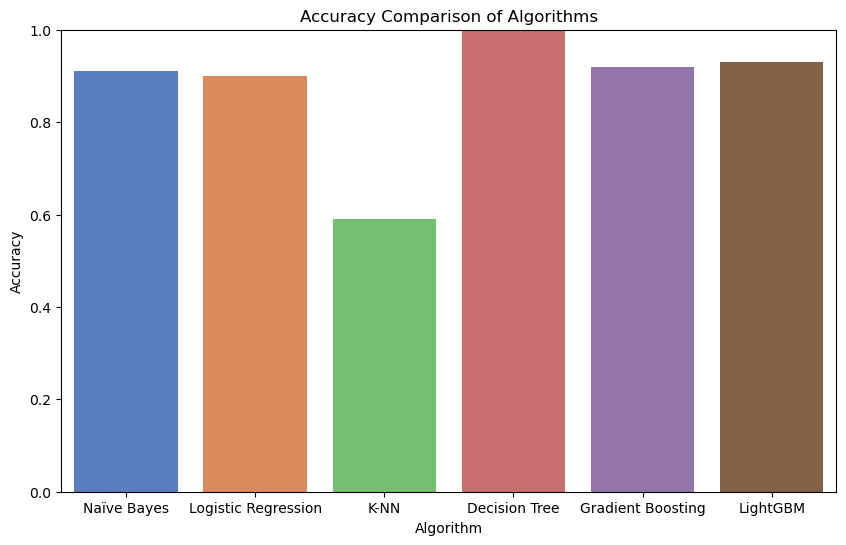

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=df_results, palette='muted')
plt.title('Accuracy Comparison of Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


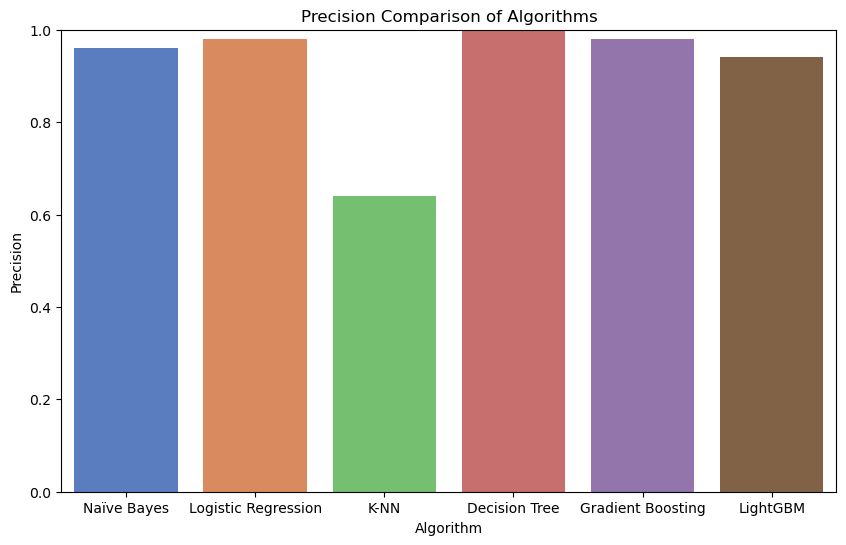

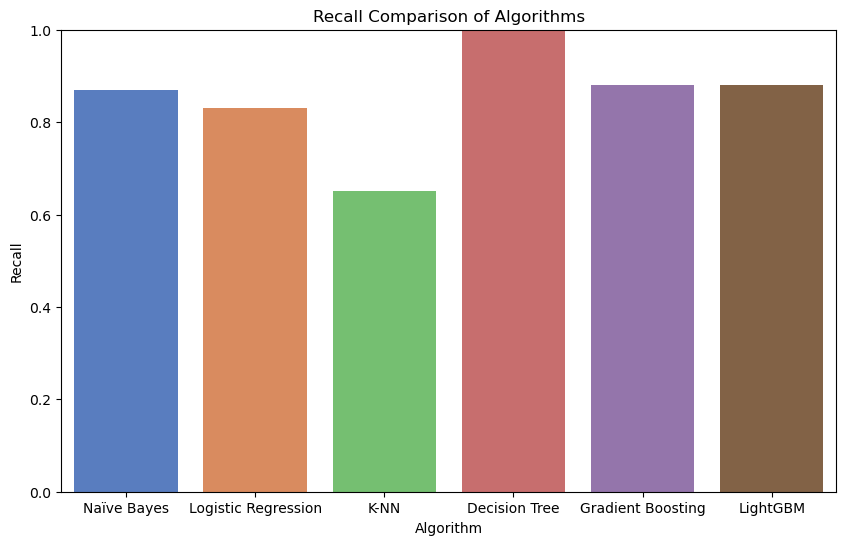

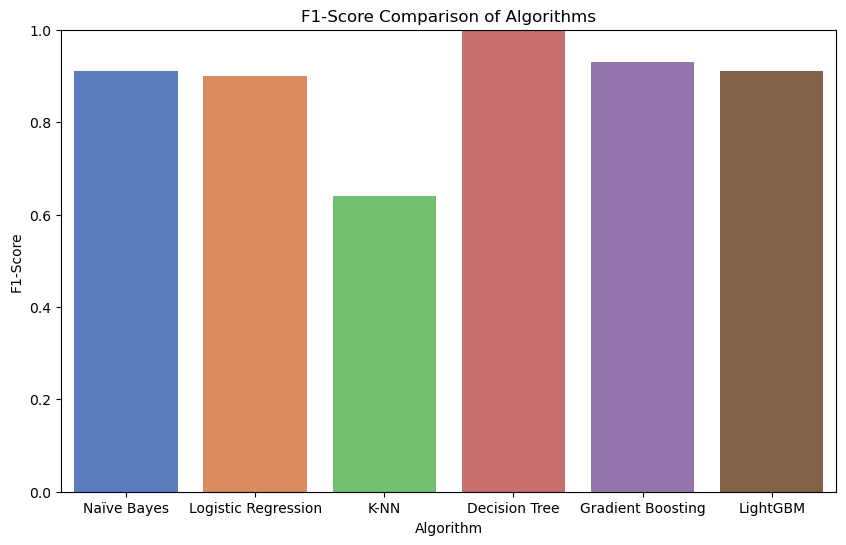

In [64]:
metrics = ['Precision', 'Recall', 'F1-Score']

# Plot each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Algorithm', y=metric, data=df_results, palette='muted')
    plt.title(f'{metric} Comparison of Algorithms')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.show()


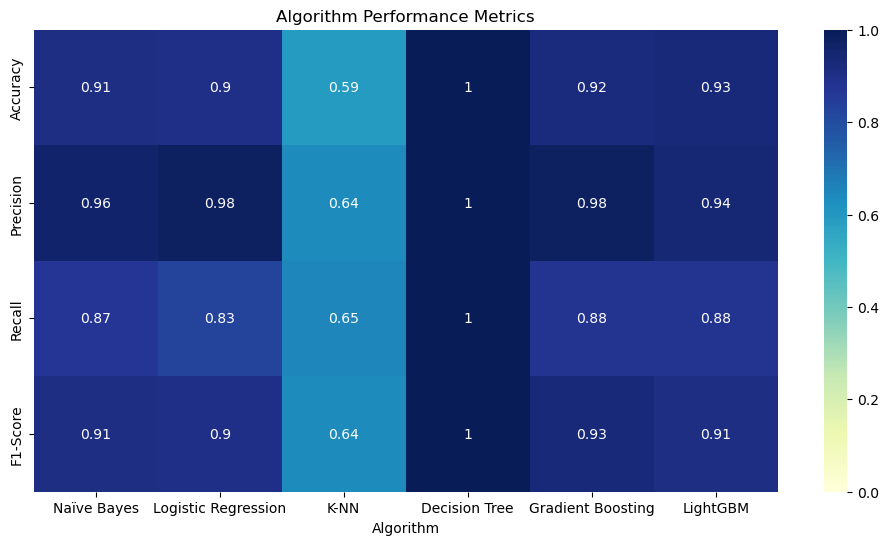

In [65]:
# Reshape data for heatmap
df_heatmap = df_results.set_index('Algorithm').T

plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu', cbar=True, vmin=0, vmax=1)
plt.title('Algorithm Performance Metrics')
plt.show()


0    213
1    160
Name: M/F, dtype: int64


<AxesSubplot:xlabel='M/F', ylabel='count'>

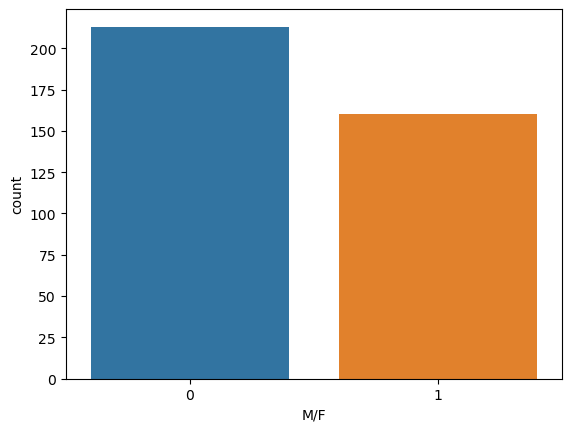

In [66]:
print(data['M/F'].value_counts())
sns.countplot(x = 'M/F', data = data)

In [ ]:
data.describe()

: 